## Neural Network from scratch (MNIST classifier)
To learn about basic neural network techniques, I want to write a simple classifier for handwritten digits.


In [10]:
import idx2numpy
import numpy as np
from matplotlib import pyplot as plt

# read in the datasets
# first get the training data
tr_imgs = idx2numpy.convert_from_file('mnist\\train-images.idx3-ubyte')
tr_labels = idx2numpy.convert_from_file('mnist\\train-labels.idx1-ubyte')

val_imgs = idx2numpy.convert_from_file('mnist\\t10k-images.idx3-ubyte')
val_labels = idx2numpy.convert_from_file('mnist\\t10k-labels.idx1-ubyte')

# define the sigmoid activation function and the derivative of it
# the activation function take in a weighted sum of neurons, and spit out something that can be fed
# to the next layer
def sigmoid(x):
    return 1/(1+ np.e**(-x))
def dsigmoid(x):
    return (np.e**(-x))/((np.e**(-x)+1)**2)


# softmax function takes in a vector and converts the input vector elements into probabilities (sort of a normalization function)
def softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)

#derivative of softmax
def dsoftmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))

In [11]:
# now to set up the neural network, of 3 layers: input, hidden, and output
# inputs will be one for every pixel of the images, which is 28 by 28
num_inputs = 28**2
# number of nodes in the second layer
num_hidden = 128
# 10 possible digits (0-9), so we have 10 output nodes
num_outputs = 10

In [12]:
# now we define a function that takes in two numbers, the number of inputs and the number of outputs of the layer,
# returns a matrix of elements that are either -1 or 1, randomly chosen, of size (num_inputs, num_outputs)
def gen_layer(inputs, outputs):
    layer = np.random.uniform(-1.0, 1.0, size=(inputs, outputs))
    # normalize the values
    layer = layer/np.sqrt(inputs*outputs)
    return layer.astype(np.float32)


# generate the matrices necessary
layer1 = gen_layer(num_inputs, num_hidden)
layer2 = gen_layer(num_hidden, num_outputs)

def iteration(x, y):
    # generates a vector of length corresponding to the number of outputs
    # this is a vector of all 0s, except for a 1 in the spot corresponding to the correct number (y)
    targets = np.zeros((len(y), 10), np.float32)
    targets[range(targets.shape[0]), y] = 1

    # we multiply the input matrix with the weights, and pass that through the activation function
    x_post1 = x.dot(layer1)
    # pass the output of the multiplication through the activation function
    x_post1s = sigmoid(x_post1)
    # the next layer is that output multiplied against the next matrix
    x_post2 = x_post1s.dot(layer2)
    # now use the softmax to normalize the outputs
    output = softmax(x_post2)

    # Now we want to compute the error (distance from the correct answer)
    error = 2 * (output - targets)/output.shape[0]* dsoftmax(x_post2)

    # now we get the backpropogation updates, starting with the last layer
    update2 = x_post1s.T @ error
    # update the error
    error = ((layer2).dot(error.T)).T*dsigmoid(x_post1)
    update1 = x.T @ error

    return output, update1, update2


In [13]:
# now we need to train the model
# This uses Stochastic Gradient Descent
# We generate batches of training data, randomly chosen from all the training data
epochs = 10000
rate = .001
size = 128

losses,accuracies,val_accuracies=[],[],[]

for i in range(epochs):
        
    # sample the indices of the training data
    sample = np.random.randint(0, tr_imgs.shape[0], size=(size))
    x = tr_imgs[sample].reshape((-1, num_inputs))
    y = tr_labels[sample]

    # pass the training data to the iteration function
    output, update1, update2 = iteration(x, y)

    # get the accuracy of the model currently
    category=np.argmax(output,axis=1)
    accuracy=(category==y).mean()
    accuracies.append(accuracy)
    
    loss=((category-y)**2).mean()
    losses.append(loss.item())

    # update the layers
    layer1 = layer1 - rate * update1
    layer2 = layer2 - rate * update2

    # test it on the validation data
    if(i%20==0):    
        val_imgs=val_imgs.reshape((-1, num_inputs))
        val_out=np.argmax(softmax(sigmoid(val_imgs.dot(layer1)).dot(layer2)),axis=1)
        val_acc=(val_out==val_labels).mean()
        val_accuracies.append(val_acc.item())
    # print out occasional updates
    if(i%500==0): print(f'For {i}th epoch: train accuracy: {accuracy:.3f} | validation accuracy:{val_acc:.3f}')

For 0th epoch: train accuracy: 0.062 | validation accuracy:0.078
For 500th epoch: train accuracy: 0.570 | validation accuracy:0.599
For 1000th epoch: train accuracy: 0.688 | validation accuracy:0.696
For 1500th epoch: train accuracy: 0.656 | validation accuracy:0.733
For 2000th epoch: train accuracy: 0.797 | validation accuracy:0.752
For 2500th epoch: train accuracy: 0.773 | validation accuracy:0.769
For 3000th epoch: train accuracy: 0.711 | validation accuracy:0.779
For 3500th epoch: train accuracy: 0.742 | validation accuracy:0.788
For 4000th epoch: train accuracy: 0.805 | validation accuracy:0.797
For 4500th epoch: train accuracy: 0.828 | validation accuracy:0.804
For 5000th epoch: train accuracy: 0.805 | validation accuracy:0.809
For 5500th epoch: train accuracy: 0.742 | validation accuracy:0.812
For 6000th epoch: train accuracy: 0.836 | validation accuracy:0.813
For 6500th epoch: train accuracy: 0.805 | validation accuracy:0.816
For 7000th epoch: train accuracy: 0.828 | validation

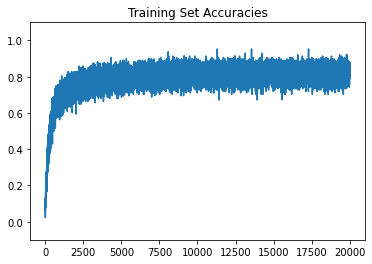

In [14]:
# plotting the accuracy
plt.ylim(-0.1, 1.1)
plt.title("Training Set Accuracies")
plt.plot(accuracies)
plt.show()

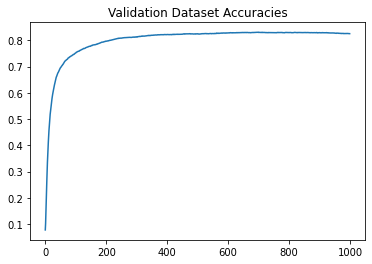

In [15]:
plt.title("Validation Dataset Accuracies")
plt.plot(val_accuracies)
plt.show()